# <font color='purple'> 기본과제 분석 보고서_종합

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'
import missingno as msno
from tqdm import tqdm_notebook

# 제 2절  현황분석
## 2. 자료분석

In [28]:
df = pd.read_pickle('../1399_data/1399_dataset.pkl')
df.head(3)

,내부고발여부,문서번호,소비자 성명,소비자 주소,식품유형,신고내용,신고내용(내용기재) 200자,신고분류,신고소분류,신고일시,...,조사불가,년도,월,요일,시도,시군구,소시도,소시군구,조시도,조시군구
0,N,A12015-0000108455,최은순,경기도 수원시 영통구 효원로 363 매탄 위브 하늘채 102동 1501호,NaN,이물발견,"2014-01-01, `오뚜기옛날자른당면`을 개봉하여 조리를 하기 위해 물에 담가보...",기타,NaN,2015-01-02,...,0,2015.0,1.0,4.0,NaN,NaN,경기도,수원시,경기도,수원시
1,N,A12015-0000108456,이종범,강원도 원주시 흥업면 한촌길 17 101호,NaN,이물발견,12/30 여주마트에서 땅콩을 구매하심.\n1/1 제품을 개봉하여 드심.\n일부가 ...,기타,NaN,2015-01-02,...,0,2015.0,1.0,4.0,NaN,NaN,강원도,원주시,경기도,여주시
2,N,A12015-0000108451,김민규,경기도 화성시 병점동 느치미마을 주공3단지 301동 203호,NaN,이물검출외(축산물),*유통기한경과*\n민원인이 1월 1일 오전 8시 47분경 세븐일레븐 강남2호점에서 ...,기타,NaN,2015-01-02,...,0,2015.0,1.0,4.0,NaN,NaN,경기도,화성시,서울특별시,서초구


In [29]:
def summary(df) :
    pd.set_option('display.max_rows', 500)
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes, 
                        '비 결측치 수(notnull' : df.notnull().sum(),
                        '결측치 수(null)' : df.isnull().sum(), 
                        '고유값 수(nunique)' : df.nunique()})
    return tf

In [30]:
summary(df)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
내부고발여부,object,50033,2851,2
문서번호,object,52884,0,52884
소비자 성명,object,52883,1,30367
소비자 주소,object,52884,0,39360
식품유형,object,21406,31478,24
신고내용,object,52884,0,18
신고내용(내용기재) 200자,object,52883,1,52800
신고분류,object,52884,0,6
신고소분류,object,49497,3387,4
신고일시,datetime64[ns],51483,1401,46159


# Plotly (Graphin libraries)

https://plot.ly/python/renderers/

In [31]:
from plotly import graph_objs as go #import plotly.graph_objects as go
import plotly 
from plotly.offline import plot
plotly.offline.plot 

<function plotly.offline.offline.plot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, output_type='file', include_plotlyjs=True, filename='temp-plot.html', auto_open=True, image=None, image_filename='plot_image', image_width=800, image_height=600, config=None, include_mathjax=False, auto_play=True, animation_opts=None)>

### 1. 시·공간별 신고 건수 현황

In [32]:
for i in ['처리기간', '신고내용', '제품구입장소', '식품유형'] :
    fig = go.Figure(data=[go.Bar(x=df[i].value_counts().index,
                                 y=df[i].value_counts())],
                    layout_title_text=  i + '_컬럼유형별 막대그래프'
                   )
    plot(fig)
    plot(fig, filename='../1399_output/' + i + '_컬럼유형별 막대그래프.html', auto_open=False)

'temp-plot.html'

'../1399_output/처리기간_컬럼유형별 막대그래프.html'

'temp-plot.html'

'../1399_output/신고내용_컬럼유형별 막대그래프.html'

'temp-plot.html'

'../1399_output/제품구입장소_컬럼유형별 막대그래프.html'

'temp-plot.html'

'../1399_output/식품유형_컬럼유형별 막대그래프.html'

#### 소비자/제조원 지역분포

In [33]:
f = go.FigureWidget()
f
f.add_scatter(x=df.시도.value_counts().index, y=df.시도.value_counts());
f.add_bar(x=df.시도.value_counts().index, y=df.시도.value_counts());
f.layout.title = '시도별 막대그래프와 산포도'

plot(fig)
plot(fig, filename='../1399_output/시도별 막대그래프와 산포도.html', auto_open=False)

FigureWidget({
    'data': [], 'layout': {'template': '...'}
})

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': 'e5c7ed4f-ba6e-4cf1-8152-e3c64b2abecb',
 …

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': 'e5c7ed4f-ba6e-4cf1-8152-e3c64b2abecb',
 …

'temp-plot.html'

'../1399_output/시도별 막대그래프와 산포도.html'

(0.0, 100.0, 0.0, 100.0)

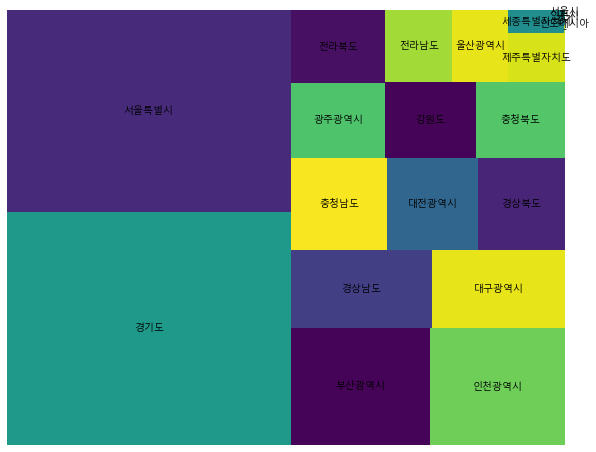

In [34]:
import squarify    # pip install squarify (algorithm for treemap)
plt.rcParams['figure.figsize'] = [10, 8]
squarify.plot(sizes=df.소시도.value_counts().reset_index()['소시도'],
              label=df.소시도.value_counts().reset_index()['index'], alpha=1)
plt.axis('off')
plt.show()

# <font color='red'> 4. 지도 그리기
## open 지도에 그리기
## 행정구역에 특정 통계량의 값을 나타내기

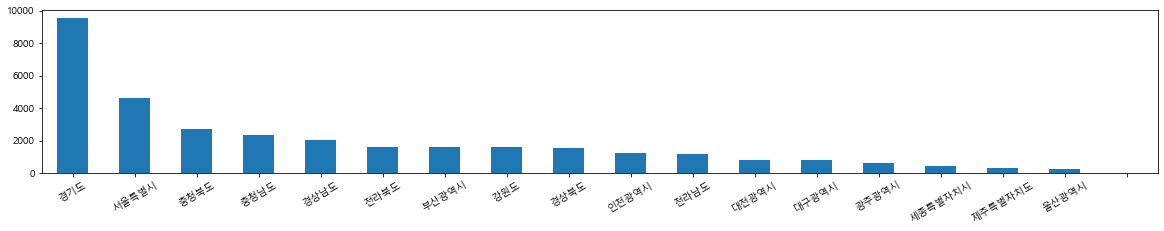

In [35]:
df.시도.value_counts().plot(kind='bar', rot='30', figsize=(20,3))

In [36]:
tf = df.시도.value_counts().reset_index()
tf.columns = ['시도', '신고건수']

시도_처리기간 = df.groupby('시도')['처리기간'].sum().reset_index()

tf = tf.merge(시도_처리기간, on='시도')
tf = tf[tf['신고건수'] != 1]
tf

,시도,신고건수,처리기간
0,경기도,9560,119971.0
1,서울특별시,4617,58453.0
2,충청북도,2738,41958.0
3,충청남도,2361,26318.0
4,경상남도,2009,23384.0
5,전라북도,1615,21848.0
6,부산광역시,1610,14548.0
7,강원도,1583,17969.0
8,경상북도,1542,16896.0
9,인천광역시,1263,13455.0


# 행정구역별 인구 수 불러오기 
http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3 : 시도별 인구수는 요기서 다운

In [37]:
pop = pd.read_excel('../1399_data/행정구역_시군구_별__성별_인구수_20200318135934.xlsx', skiprows=1)
pop
pop[1:18][['행정구역(시군구)별', '총인구수 (명)']]

,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명).1,남자인구수 (명).1,여자인구수 (명).1,총인구수 (명).2,남자인구수 (명).2,여자인구수 (명).2
0,전국,51849861,25864816,25985045,51847509,25862863,25984646,51844627,25860491,25984136
1,서울특별시,9729107,4744059,4985048,9733509,4745088,4988421,9736962,4745133,4991829
2,부산광역시,3413841,1675417,1738424,3411819,1674202,1737617,3410925,1673266,1737659
3,대구광역시,2438031,1205286,1232745,2436488,1204387,1232101,2432883,1202364,1230519
4,인천광역시,2957026,1482249,1474777,2956119,1481749,1474370,2954955,1481133,1473822
5,광주광역시,1456468,720740,735728,1456688,720931,735757,1456121,720686,735435
6,대전광역시,1474870,736607,738263,1474152,736259,737893,1473125,735791,737334
7,울산광역시,1148019,589712,558307,1147037,589233,557804,1145710,588626,557084
8,세종특별자치시,340575,169845,170730,342328,170729,171599,343788,171403,172385
9,경기도,13239666,6659995,6579671,13250368,6665310,6585058,13265377,6672706,6592671


,행정구역(시군구)별,총인구수 (명)
1,서울특별시,9729107
2,부산광역시,3413841
3,대구광역시,2438031
4,인천광역시,2957026
5,광주광역시,1456468
6,대전광역시,1474870
7,울산광역시,1148019
8,세종특별자치시,340575
9,경기도,13239666
10,강원도,1541502


In [41]:
tf = tf.merge(pop[1:18][['행정구역(시군구)별', '총인구수 (명)']], left_on = '시도', right_on ='행정구역(시군구)별', how ='left')
tf

,시도,신고건수,처리기간,행정구역(시군구)별,총인구수 (명)
0,경기도,9560,119971.0,경기도,13239666
1,서울특별시,4617,58453.0,서울특별시,9729107
2,충청북도,2738,41958.0,충청북도,1600007
3,충청남도,2361,26318.0,충청남도,2123709
4,경상남도,2009,23384.0,경상남도,3362553
5,전라북도,1615,21848.0,전라북도,1818917
6,부산광역시,1610,14548.0,부산광역시,3413841
7,강원도,1583,17969.0,강원도,1541502
8,경상북도,1542,16896.0,경상북도,2665836
9,인천광역시,1263,13455.0,인천광역시,2957026


In [42]:
tf['신고건수_인구'] = tf['신고건수']*10000 / tf['총인구수 (명)']
tf.sort_values('신고건수_인구', ascending=False, inplace=True)

In [ ]:
f = go.FigureWidget()
f
f.add_scatter(x=tf.시도, y=tf['신고건수']);
f.add_bar(x=tf.시도, y=tf['신고건수_인구']);
f.layout.title = '시도별 막대그래프와 산포도'

In [43]:
from plotly.subplots import make_subplots

In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

In [51]:
# Add traces
fig.add_trace(
    go.Scatter(x=tf.시도, y=tf['신고건수'], name="yaxis data"),
    secondary_y=False,
)

fig.add_trace(
    go.Bar(x=tf.시도, y=tf['신고건수_인구'], name="yaxis2 data"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

In [44]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

In [46]:
# Add traces
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[40, 50, 60], name="yaxis data"),
              secondary_y=False,
             )

# Add figure title
fig.update_layout(title_text="Double Y Axis Example")
# Set x-axis title
fig.update_xaxes(title_text="xaxis title")
# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()